In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


    Examining trends in renewable energy consumption over time, both overall and by specific source
    Comparing renewable energy usage across different sectors of the economy
    Forecasting future renewable energy consumption based on historical trends and projections
    Analyzing the impact of policies and incentives on renewable energy adoption
    Identifying opportunities for growth and investment in renewable energy technologies
    Studying the seasonality of renewable energy consumption and how it varies by source and sector
    Evaluating progress towards renewable energy goals and targets at the national and state level

Researchers, policymakers, industry analysts, and investors may all find value in this dataset for understanding and driving the transition to a clean energy future in the United States.




In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,Year,Month,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
0,1973,1,Commerical,0.00,0.00,0.0,0.0,0.570,0.000,0.0,0.0,0.570,0.570,0.0,0.0,0.000,0.0
1,1973,1,Electric Power,0.00,0.49,0.0,0.0,0.054,0.157,0.0,0.0,0.211,89.223,0.0,0.0,88.522,0.0
2,1973,1,Industrial,1.04,0.00,0.0,0.0,98.933,0.000,0.0,0.0,98.933,99.973,0.0,0.0,0.000,0.0
3,1973,1,Residential,0.00,0.00,0.0,0.0,30.074,0.000,0.0,0.0,0.000,30.074,0.0,0.0,0.000,0.0
4,1973,1,Transportation,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0


In [3]:
# Data cleaning and preprocessing
df['Total Energy'] = df.iloc[:, 3:-4].sum(axis=1)  # Calculate total energy
df['Year'] = df['Year'].astype(int)  # Convert Year to integer

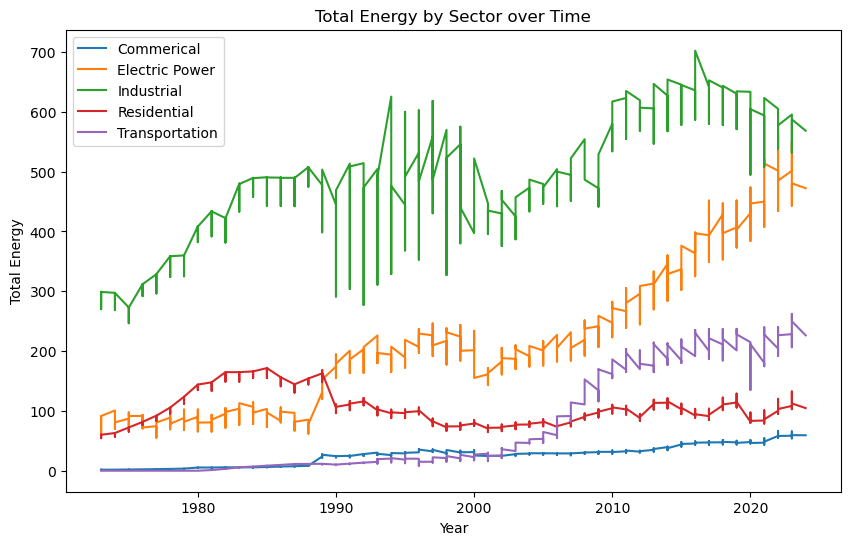

In [4]:
plt.figure(figsize=(10, 6))
for sector in df['Sector'].unique():
    sector_data = df[df['Sector'] == sector]
    plt.plot(sector_data['Year'], sector_data['Total Energy'], label=sector)
plt.xlabel('Year')
plt.ylabel('Total Energy')
plt.title('Total Energy by Sector over Time')
plt.legend()
plt.show()

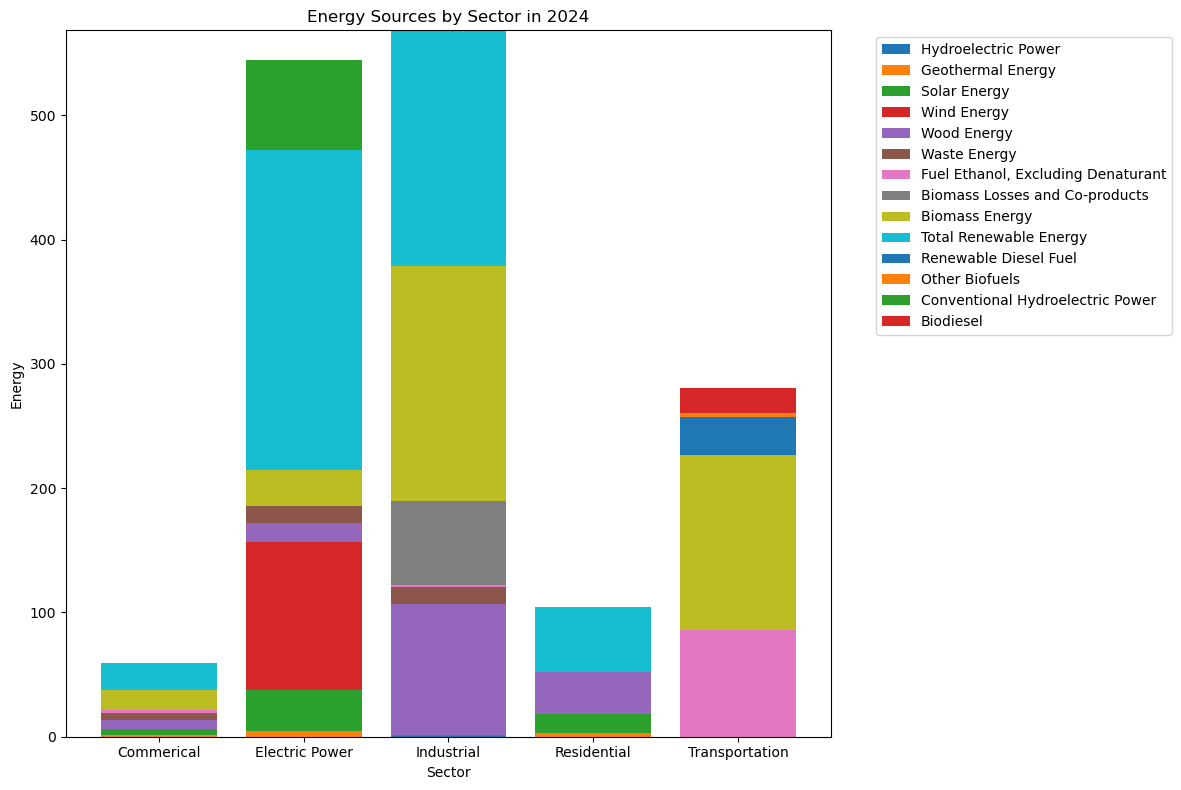

In [5]:
latest_year = df['Year'].max()
latest_data = df[df['Year'] == latest_year]
energy_sources = ['Hydroelectric Power', 'Geothermal Energy', 'Solar Energy', 'Wind Energy',
                  'Wood Energy', 'Waste Energy', 'Fuel Ethanol, Excluding Denaturant',
                  'Biomass Losses and Co-products', 'Biomass Energy', 'Total Renewable Energy',
                  'Renewable Diesel Fuel', 'Other Biofuels', 'Conventional Hydroelectric Power', 'Biodiesel']

plt.figure(figsize=(12, 8))
bottom = np.zeros(len(latest_data))
for source in energy_sources:
    plt.bar(latest_data['Sector'], latest_data[source], bottom=bottom, label=source)
    bottom += latest_data[source]
plt.xlabel('Sector')
plt.ylabel('Energy')
plt.title(f'Energy Sources by Sector in {latest_year}')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

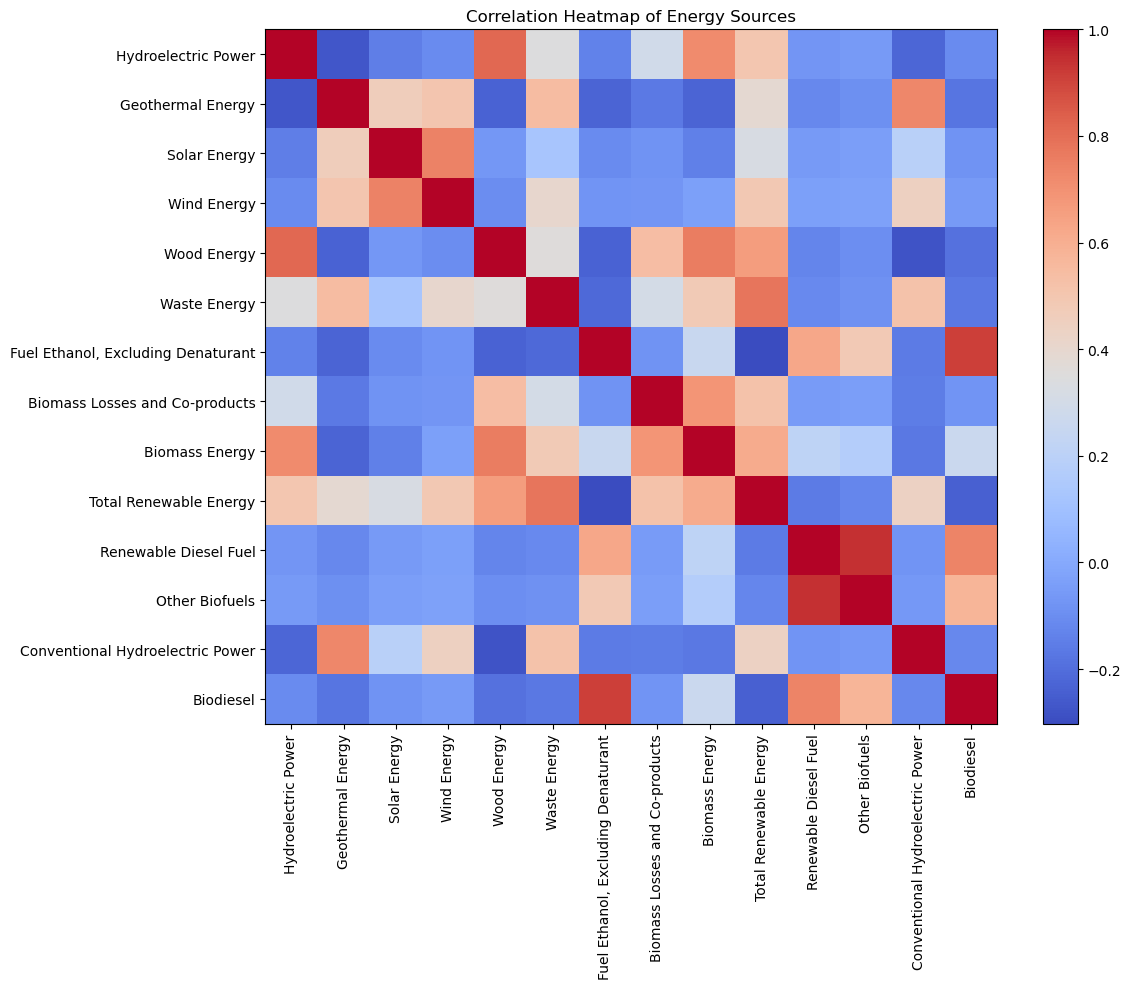

In [6]:
energy_data = df.iloc[:, 3:-1]  # Select energy source columns
correlation_matrix = energy_data.corr()

plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(energy_sources)), energy_sources, rotation=90)
plt.yticks(range(len(energy_sources)), energy_sources)
plt.title('Correlation Heatmap of Energy Sources')
plt.tight_layout()
plt.show()